## Library Imports

In [1]:
from decouple import AutoConfig
import os
import pandas as pd
import matplotlib.pyplot as plt

## Functional Imports

In [6]:
from src.video.video_select import select_video
from src.video.video_insert import insert_multiple_video
from src.videos_manifest import list_files_in_directory

from src.comments.comment_select import select_comment
from src.comments.comment_insert import *
from src.comments.comment_parser import *

### Load Manifest Data

In [3]:
videos_manifest_df = pd.read_csv('./../data/raw/raw_videos_manifest.csv')
videos_manifest_filenames = videos_manifest_df["filename"].to_numpy()
video_raw_directory = ".././data/raw/videos/"

comments_manifest_df = pd.read_csv('./../data/raw/raw_comments_manifest.csv')
comments_manifest_filenames = comments_manifest_df["filename"].to_numpy()
comments_manifest_video_ids = comments_manifest_df["video_id"].to_numpy()
comments_raw_directory = ".././data/raw/comments-threads/"

comments_manifest_df

,filename,video_id,created_at,format
0,5sLYAQS9sWQ PAGE1.json,5sLYAQS9sWQ,NaN,json
1,bxIF9X9k2IE PAGE1.json,bxIF9X9k2IE,NaN,json
2,fUpChfNN5Uo PAGE1.json,fUpChfNN5Uo,NaN,json
3,fUpChfNN5Uo PAGE2.json,fUpChfNN5Uo,NaN,json
4,fUpChfNN5Uo PAGE3.json,fUpChfNN5Uo,NaN,json
5,fUpChfNN5Uo PAGE4.json,fUpChfNN5Uo,NaN,json
6,fUpChfNN5Uo PAGE5.json,fUpChfNN5Uo,NaN,json
7,IMU1V-JugKo PAGE1.json,IMU1V-JugKo,NaN,json
8,jVPd7lEvjtg PAGE1.json,jVPd7lEvjtg,2023-10-25T23:32:56.702Z,json
9,T8UXgR-EtoM PAGE1.json,T8UXgR-EtoM,2023-10-25T23:33:17.583Z,json


## Configure PostgreSQL Environment Variables

In [4]:
config = AutoConfig(search_path='.')
db_params = {
    "host": "localhost",
    "port": config("DB_PORT"),
    "database": "YouTubeSentimentData",
    "user": config("DB_USER"),
    "password": config("DB_PASSWORD")
}

### Read Data Queries

In [31]:
all_videos = select_video(db_params)
all_comments = select_comment(db_params)

Database connection is closed
Database connection is closed


### Insert Comment Query

In [7]:
comment_threads_path = os.path.join(os.path.dirname(os.getcwd()), "data", "raw", "comment-threads")
file_paths = list_file_paths(comment_threads_path, comments_manifest_video_ids, comments_manifest_filenames)

insert_pages_of_comments(file_paths, db_params, return_all_comment_thread_data)


Error connecting to the database: duplicate key value violates unique constraint "comments_pkey"
DETAIL:  Key (comment_id)=(UgxchCXrsA-Nvu6NUah4AaABAg) already exists.

Database connection is closed
Error connecting to the database: duplicate key value violates unique constraint "comments_pkey"
DETAIL:  Key (comment_id)=(UgxPsiKk2oEu5gt0bRp4AaABAg) already exists.

Database connection is closed
Error connecting to the database: duplicate key value violates unique constraint "comments_pkey"
DETAIL:  Key (comment_id)=(Ugzd68e_8fmF71TZwzl4AaABAg) already exists.

Database connection is closed
Error connecting to the database: duplicate key value violates unique constraint "comments_pkey"
DETAIL:  Key (comment_id)=(Ugy0Tte-D5Gxf2txoTN4AaABAg) already exists.

Database connection is closed
Error connecting to the database: duplicate key value violates unique constraint "comments_pkey"
DETAIL:  Key (comment_id)=(UgxIdL5xa_B_2Icc1DR4AaABAg) already exists.

Database connection is closed
Error

KeyboardInterrupt: 

### Insert Videos Query

In [ ]:
insert_multiple_video(db_params, videos_manifest_filenames, video_raw_directory, return_all_video_section_data, parse_all_video_section_data)

### Convert Data to Pandas Dataframes

In [47]:
all_videos_df = pd.DataFrame(all_videos)
all_comments_df = pd.DataFrame(all_comments)

# PLOTS

### Add Upload Year Column

In [ ]:
# Convert the "uploadDate" column to datetime format
all_videos_df["uploadDate"] = pd.to_datetime(all_videos_df[1])
all_videos_df["Year"] = all_videos_df["uploadDate"].dt.year

all_videos_df["uploadDate"]
all_videos_df["Year"]

### Frequency of Year Upload Plot

In [ ]:
yearly_counts = all_videos_df["Year"].value_counts().sort_index()
yearly_counts.plot(kind="bar", xlabel="Year", ylabel="Upload Frequency", title="Upload Frequency by Year")

### Frequency of Comment Like Plot

<AxesSubplot: title={'center': 'Frequency of Count of Likes'}, xlabel='Count of Likes', ylabel='Frequency'>

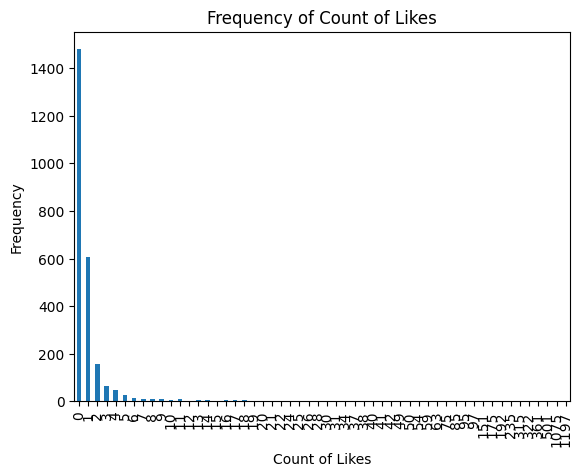

In [46]:
like_counts = all_comments_df[12].value_counts().sort_index()
like_counts.plot(kind="bar", xlabel="Count of Likes", ylabel="Frequency", title="Frequency of Count of Likes")

In [ ]:
# FROM POSTGRES DATABASE
#tags_corpus = create_tags_corpus(db_params, "../sql/video/video_read_tags.SQL")
#print(tags_corpus)